In [1]:
import numpy as np


def write_distance_matrix(n, mean, sigma):
    distance_matrix = np.zeros((n, n))

    for row in range(n):
        for col in range(n):
            distance = 0
            while distance <= 0:
                distance = np.random.normal(mean, sigma)
                distance_matrix[row][col] = distance

    np.savetxt(
        f"{n}_{mean}_{sigma}.out",
        distance_matrix,
        delimiter=" ",
        fmt="%1.4f",
        header=str(n),
        comments="",
    )


if __name__ == "__main__":
    n = int(input("Enter the number of locations: "))
    mean = float(input("Enter the mean: "))
    sigma = float(input("Enter the standard deviation: "))

    write_distance_matrix(n, mean, sigma)

Enter the number of locations: 7
Enter the mean: 7
Enter the standard deviation: 7


In [2]:
import numpy as np

# Calculate the euclidian distance in n-space of the route r traversing cities c, ending at the path start.
path_distance = lambda r,c: np.sum([np.linalg.norm(c[r[p]]-c[r[p-1]]) for p in range(len(r))])
# Reverse the order of all elements from element i to element k in array r.
two_opt_swap = lambda r,i,k: np.concatenate((r[0:i],r[k:-len(r)+i-1:-1],r[k+1:len(r)]))

def two_opt(cities,improvement_threshold): # 2-opt Algorithm adapted from https://en.wikipedia.org/wiki/2-opt
    route = np.arange(cities.shape[0]) # Make an array of row numbers corresponding to cities.
    improvement_factor = 1 # Initialize the improvement factor.
    best_distance = path_distance(route,cities) # Calculate the distance of the initial path.
    while improvement_factor > improvement_threshold: # If the route is still improving, keep going!
        distance_to_beat = best_distance # Record the distance at the beginning of the loop.
        for swap_first in range(1,len(route)-2): # From each city except the first and last,
            for swap_last in range(swap_first+1,len(route)): # to each of the cities following,
                new_route = two_opt_swap(route,swap_first,swap_last) # try reversing the order of these cities
                new_distance = path_distance(new_route,cities) # and check the total distance with this modification.
                if new_distance < best_distance: # If the path distance is an improvement,
                    route = new_route # make this the accepted best route
                    best_distance = new_distance # and update the distance corresponding to this route.
        improvement_factor = 1 - best_distance/distance_to_beat # Calculate how much the route has improved.
    return route # When the route is no longer improving substantially, stop searching and return the route.

In [4]:
cities = np.array([[21.6606, 2.5075, 4.0142, 5.2191, 0.5313, 1.8145, 10.3831],
                   [11.0844, 16.0825, 3.0075, 11.3923, 11.8279, 13.2374, 4.9982],
                   [5.7343, 6.8439, 10.5461, 8.0046, 5.8106, 5.5460, 6.8341],
                   [11.3655, 9.6136, 8.6744, 16.1405 ,1.9856 ,12.6057 ,10.5764],
                   [3.0814, 4.7846, 12.2573, 10.0778 ,14.0274, 12.8336, 7.7043],
                   [5.9445, 7.6150, 6.7868 ,18.1294, 1.9651, 4.7226, 2.2406],
                   [3.0343, 7.6751, 8.0768, 14.5955, 7.8130, 12.6386, 8.2825]])

In [5]:
route = two_opt(cities,0.001)

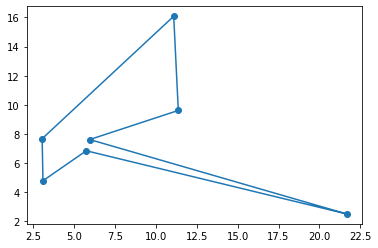

Route: [0 2 4 6 1 3 5]

Distance: 105.61028268307095


In [6]:
import matplotlib.pyplot as plt
# Reorder the cities matrix by route order in a new matrix for plotting.
new_cities_order = np.concatenate((np.array([cities[route[i]] for i in range(len(route))]),np.array([cities[0]])))
# Plot the cities.
plt.scatter(cities[:,0],cities[:,1])
# Plot the path.
plt.plot(new_cities_order[:,0],new_cities_order[:,1])
plt.show()
# Print the route as row numbers and the total distance travelled by the path.
print("Route: " + str(route) + "\n\nDistance: " + str(path_distance(route,cities)))

In [33]:
import numpy as np

def write_distance_matrix(n, mean, sigma):
    distance_matrix = np.zeros((n, n))

    for row in range(n):
        for col in range(n):
            distance = 0
            while distance <= 0:
                distance = np.random.normal(mean, sigma)
                distance_matrix[row][col] = distance
    return distance_matrix

In [36]:
cities2 = write_distance_matrix(20,20,20)

In [37]:
route = two_opt(cities,0.001)

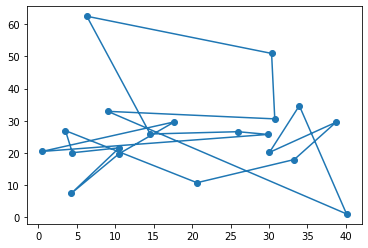

Route: [ 0  8 12 10 11  2 15 18  9 17 19 14  6 16 13  3  1  4  7  5]

Distance: 1650.9674592939898


In [38]:
import matplotlib.pyplot as plt
# Reorder the cities matrix by route order in a new matrix for plotting.
new_cities_order = np.concatenate((np.array([cities[route[i]] for i in range(len(route))]),np.array([cities[0]])))
# Plot the cities.
plt.scatter(cities[:,0],cities[:,1])
# Plot the path.
plt.plot(new_cities_order[:,0],new_cities_order[:,1])
plt.show()
# Print the route as row numbers and the total distance travelled by the path.
print("Route: " + str(route) + "\n\nDistance: " + str(path_distance(route,cities)))

In [46]:
# Python3 program to solve
# Traveling Salesman Problem using
# Branch and Bound.
import math
maxsize = float('inf')
 
# Function to copy temporary solution
# to the final solution
def copyToFinal(curr_path):
    final_path[:N + 1] = curr_path[:]
    final_path[N] = curr_path[0]
 
# Function to find the minimum edge cost
# having an end at the vertex i
def firstMin(adj, i):
    min = maxsize
    for k in range(N):
        if adj[i][k] < min and i != k:
            min = adj[i][k]
 
    return min
 
# function to find the second minimum edge
# cost having an end at the vertex i
def secondMin(adj, i):
    first, second = maxsize, maxsize
    for j in range(N):
        if i == j:
            continue
        if adj[i][j] <= first:
            second = first
            first = adj[i][j]
 
        elif(adj[i][j] <= second and
             adj[i][j] != first):
            second = adj[i][j]
 
    return second
 
# function that takes as arguments:
# curr_bound -> lower bound of the root node
# curr_weight-> stores the weight of the path so far
# level-> current level while moving
# in the search space tree
# curr_path[] -> where the solution is being stored
# which would later be copied to final_path[]
def TSPRec(adj, curr_bound, curr_weight,
              level, curr_path, visited):
    global final_res
     
    # base case is when we have reached level N
    # which means we have covered all the nodes once
    if level == N:
         
        # check if there is an edge from
        # last vertex in path back to the first vertex
        if adj[curr_path[level - 1]][curr_path[0]] != 0:
             
            # curr_res has the total weight
            # of the solution we got
            curr_res = curr_weight + adj[curr_path[level - 1]]\
                                        [curr_path[0]]
            if curr_res < final_res:
                copyToFinal(curr_path)
                final_res = curr_res
        return
 
    # for any other level iterate for all vertices
    # to build the search space tree recursively
    for i in range(N):
         
        # Consider next vertex if it is not same
        # (diagonal entry in adjacency matrix and
        #  not visited already)
        if (adj[curr_path[level-1]][i] != 0 and
                            visited[i] == False):
            temp = curr_bound
            curr_weight += adj[curr_path[level - 1]][i]
 
            # different computation of curr_bound
            # for level 2 from the other levels
            if level == 1:
                curr_bound -= ((firstMin(adj, curr_path[level - 1]) +
                                firstMin(adj, i)) / 2)
            else:
                curr_bound -= ((secondMin(adj, curr_path[level - 1]) +
                                 firstMin(adj, i)) / 2)
 
            # curr_bound + curr_weight is the actual lower bound
            # for the node that we have arrived on.
            # If current lower bound < final_res,
            # we need to explore the node further
            if curr_bound + curr_weight < final_res:
                curr_path[level] = i
                visited[i] = True
                 
                # call TSPRec for the next level
                TSPRec(adj, curr_bound, curr_weight,
                       level + 1, curr_path, visited)
 
            # Else we have to prune the node by resetting
            # all changes to curr_weight and curr_bound
            curr_weight -= adj[curr_path[level - 1]][i]
            curr_bound = temp
 
            # Also reset the visited array
            visited = [False] * len(visited)
            for j in range(level):
                if curr_path[j] != -1:
                    visited[curr_path[j]] = True
 
# This function sets up final_path
def TSP(adj):
     
    # Calculate initial lower bound for the root node
    # using the formula 1/2 * (sum of first min +
    # second min) for all edges. Also initialize the
    # curr_path and visited array
    curr_bound = 0
    curr_path = [-1] * (N + 1)
    visited = [False] * N
 
    # Compute initial bound
    for i in range(N):
        curr_bound += (firstMin(adj, i) +
                       secondMin(adj, i))
 
    # Rounding off the lower bound to an integer
    curr_bound = math.ceil(curr_bound / 2)
 
    # We start at vertex 1 so the first vertex
    # in curr_path[] is 0
    visited[0] = True
    curr_path[0] = 0
 
    # Call to TSPRec for curr_weight
    # equal to 0 and level 1
    TSPRec(adj, curr_bound, 0, 1, curr_path, visited)
 
# Driver code
 
# Adjacency matrix for the given graph

N = 20
 
# final_path[] stores the final solution
# i.e. the // path of the salesman.
final_path = [None] * (N + 1)
 
# visited[] keeps track of the already
# visited nodes in a particular path
visited = [False] * N
 
# Stores the final minimum weight
# of shortest tour.
final_res = maxsize
 
TSP(cities)
 
print("Minimum cost :", final_res)
print("Path Taken : ", end = ' ')
for i in range(N + 1):
    print(final_path[i], end = ' ')

Minimum cost : 93.18880817205721
Path Taken :  0 13 5 1 3 7 2 12 19 10 17 9 8 6 11 4 14 15 16 18 0 

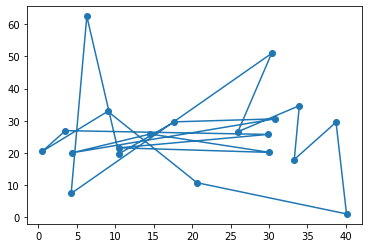

In [55]:
import matplotlib.pyplot as plt
# Reorder the cities matrix by route order in a new matrix for plotting.
new_cities_order = np.concatenate((np.array([cities[final_path[i]] for i in range(len(final_path))]),np.array([cities[0]])))
# Plot the cities.
plt.scatter(cities[:,0],cities[:,1])
# Plot the path.
plt.plot(new_cities_order[:,0],new_cities_order[:,1])
plt.show()